In [1]:
# Import Libraries

import pandas as pd  
import seaborn as sns
import numpy as np

import matplotlib  
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # adjusts the configureation of the plots created   

# read the data
df = pd.read_csv(r'C:\dev\PythonProject\Correlation in python\movies.csv')        

In [58]:
# to display dataframe in scrollable format
from IPython.display import display, HTML

def display_scrollable(df, height=300):
    display(HTML(f"""
    <div style="height:{height}px; overflow-y:auto; border:1px solid #ccc">
      {df.to_html()}
    </div>
    """))


In [59]:
# Data display
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime score_range correct_year  
0   46998772        Warner Bros.    146.0      (8, 9]         1980  
1   58853106   Columbia Pictures    104.0      (5, 6]         1980  
2  538375067           Lucasfilm    124.0      (8, 9]         1980  
3   83453539  Paramount Pictures     88.0      (7, 8]         1980  
4   39846344      Orion Pictures     98.0      (7, 8]         1980

In [3]:
# Looking for missing Data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
# viewing rows with any missing values
df[df.isnull().any(axis=1)]

name rating   genre  year                           released  \
16               Fame      R   Drama  1980       May 16, 1980 (United States)   
19         Stir Crazy      R  Comedy  1980  December 12, 1980 (United States)   
24       Urban Cowboy     PG   Drama  1980       June 6, 1980 (United States)   
25     Altered States      R  Horror  1980  December 25, 1980 (United States)   
26    Little Darlings      R  Comedy  1980     March 21, 1980 (United States)   
...               ...    ...     ...   ...                                ...   
7663     More to Life    NaN   Drama  2020   October 23, 2020 (United States)   
7664      Dream Round    NaN  Comedy  2020   February 7, 2020 (United States)   
7665    Saving Mbango    NaN   Drama  2020          April 27, 2020 (Cameroon)   
7666     It's Just Us    NaN   Drama  2020    October 1, 2020 (United States)   
7667        Tee em el    NaN  Horror  2020    August 19, 2020 (United States)   

      score    votes        director              writer              star  \
16      6.6  21000.0     Alan Parker    Christopher Gore       Eddie Barth   
19      6.8  26000.0  Sidney Poitier  Bruce Jay Friedman       Gene Wilder   
24      6.4  14000.0   James Bridges        Aaron Latham     John Travolta   
25      6.9  33000.0     Ken Russell     Paddy Chayefsky      William Hurt   
26      6.5   5100.0     Ron Maxwell           Kimi Peck      Tatum O'Neal   
...     ...      ...             ...                 ...               ...   
7663    3.1     18.0   Joseph Ebanks       Joseph Ebanks      Shannon Bond   
7664    4.7     36.0    Dusty Dukatz         Lisa Huston  Michael Saquella   
7665    5.7     29.0    Nkanya Nkwai        Lynno Lovert      Onyama Laura   
7666    NaN      NaN   James Randall       James Randall     Christina Roz   
7667    5.7      7.0    Pereko Mosia        Pereko Mosia  Siyabonga Mabaso   

            country   budget        gross  \
16    United States      NaN   21202829.0   
19    United States      NaN  101300000.0   
24    United States      NaN   46918287.0   
25    United States      NaN   19853892.0   
26    United States      NaN   34326249.0   
...             ...      ...          ...   
7663  United States   7000.0          NaN   
7664  United States      NaN          NaN   
7665  United States  58750.0          NaN   
7666  United States  15000.0          NaN   
7667   South Africa      NaN          NaN   

                                      company  runtime  
16                  Metro-Goldwyn-Mayer (MGM)    134.0  
19                          Columbia Pictures    111.0  
24                         Paramount Pictures    132.0  
25                               Warner Bros.    102.0  
26    Stephen Friedman/Kings Road Productions     96.0  
...                                       ...      ...  
7663                                      NaN     90.0  
7664                Cactus Blue Entertainment     90.0  
7665                         Embi Productions      NaN  
7666                                      NaN    120.0  
7667                              PK 65 Films    102.0  

[2247 rows x 15 columns]

In [ ]:
# checking the number of misssing values
print(df[df.isnull().any(axis = 1)].shape[0])

2247


In [16]:
# checking for missing values in specific columns
df.isnull().sum()[df.isnull().sum()>0]

rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [15]:
# general statistics of missing values
print('Number of missing values in budget: ',df['budget'].isnull().sum())
print('Number of missing values in gross: ',df['gross'].isnull().sum())

print(df['budget'].describe())
print(df['gross'].describe())

Number of missing values in budget:  2171
Number of missing values in gross:  189
count    5.497000e+03
mean     3.558988e+07
std      4.145730e+07
min      3.000000e+03
25%      1.000000e+07
50%      2.050000e+07
75%      4.500000e+07
max      3.560000e+08
Name: budget, dtype: float64
count    7.479000e+03
mean     7.850054e+07
std      1.657251e+08
min      3.090000e+02
25%      4.532056e+06
50%      2.020576e+07
75%      7.601669e+07
max      2.847246e+09
Name: gross, dtype: float64


In [25]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

CLEANING THE DATA

In [31]:
# 1. Identifying the rows with samll number of missing values
# df[df['score'].isnull()]
df[df['votes'].isnull()]
# df[df['runtime'].isnull()]


Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []

In [26]:
# 2. Manually filling small number of missing vaalues of columns
df.loc[7661,'score'] = 6.9
df.loc[7661,'votes'] = 23

df.loc[7666,'score'] = 8.4
df.loc[7666, 'votes'] = 9 

df.loc[5728,'runtime'] = 103
df.loc[5730,'runtime'] = 119
df.loc[6195, 'runtime'] = 91
df.loc[7665, 'runtime'] = 110

# 3. Dropping rows with missing values
df.drop(7662, inplace=True)

In [ ]:
# 4. Filling unknown for datatype = objects
df['released'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['star'].fillna('Unknown', inplace=True)
df['company'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['writer'].fillna('Unknown', inplace=True)

In [ ]:
# 5. Uisng median of score to fill missssing budget and gross valuess
# grouping by score ranges instead of exxact values
df['score_range'] = pd.cut(df['score'], bins=[0,1,2,3,4,5,6,7,8,9,10])

# Filling columns based on score_range
df['budget'].fillna(df.groupby('score_range')['budget'].transform('median'),inplace=True)
df['gross'].fillna(df.groupby('score_range')['gross'].transform('median'), inplace=True)

In [ ]:
# Checking after making the changes
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, score_range]
Index: []

In [42]:
# change data type of a column
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [94]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6586       6      6  1980      1705    8.4   927000.0      2589    4013   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1631   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2566   
3   286       4      4  1980      1492    7.7   221000.0      1301    1999   
4  1027       6      4  1980      1543    7.3   108000.0      1054     520   

   star  country    budget      gross  company  runtime score_range  \
0  1046       54  19000000   46998772     2320    146.0      (8, 9]   
1   326       55   4500000   58853106      731    104.0      (5, 6]   
2  1744       55  18000000  538375067     1540    124.0      (8, 9]   
3  2245       55   3500000   83453539     1812     88.0      (7, 8]   
4   409       55   6000000   39846344     1777     98.0      (7, 8]   

   correct_year  
0             0  
1             0  
2             0  
3             0  
4             0

In [ ]:
# in the datrset being used the years in the 'year' column does not  match with the 'released' column
# creating a new column 'year' from the 'released' column
df['correct_year'] = df['released'].str.extract(r'(\d{4})')
df.head()

name   rating      genre  \
0                                        The Shining        R      Drama   
1                                    The Blue Lagoon        R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back       PG     Action   
3                                          Airplane!       PG     Comedy   
4                                         Caddyshack        R     Comedy   
...                                              ...      ...        ...   
7663                                    More to Life  Unknown      Drama   
7664                                     Dream Round  Unknown     Comedy   
7665                                   Saving Mbango  Unknown      Drama   
7666                                    It's Just Us  Unknown      Drama   
7667                                       Tee em el  Unknown     Horror   

      year                          released  score      votes  \
0     1980     June 13, 1980 (United States)    8.4   927000.0   
1     1980      July 2, 1980 (United States)    5.8    65000.0   
2     1980     June 20, 1980 (United States)    8.7  1200000.0   
3     1980      July 2, 1980 (United States)    7.7   221000.0   
4     1980     July 25, 1980 (United States)    7.3   108000.0   
...    ...                               ...    ...        ...   
7663  2020  October 23, 2020 (United States)    3.1       18.0   
7664  2020  February 7, 2020 (United States)    4.7       36.0   
7665  2020         April 27, 2020 (Cameroon)    5.7       29.0   
7666  2020   October 1, 2020 (United States)    8.4        9.0   
7667  2020   August 19, 2020 (United States)    5.7        7.0   

             director                   writer              star  \
0     Stanley Kubrick             Stephen King    Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole    Brooke Shields   
2      Irvin Kershner           Leigh Brackett       Mark Hamill   
3        Jim Abrahams             Jim Abrahams       Robert Hays   
4        Harold Ramis       Brian Doyle-Murray       Chevy Chase   
...               ...                      ...               ...   
7663    Joseph Ebanks            Joseph Ebanks      Shannon Bond   
7664     Dusty Dukatz              Lisa Huston  Michael Saquella   
7665     Nkanya Nkwai             Lynno Lovert      Onyama Laura   
7666    James Randall            James Randall     Christina Roz   
7667     Pereko Mosia             Pereko Mosia  Siyabonga Mabaso   

             country    budget      gross                    company  runtime  \
0     United Kingdom  19000000   46998772               Warner Bros.    146.0   
1      United States   4500000   58853106          Columbia Pictures    104.0   
2      United States  18000000  538375067                  Lucasfilm    124.0   
3      United States   3500000   83453539         Paramount Pictures     88.0   
4      United States   6000000   39846344             Orion Pictures     98.0   
...              ...       ...        ...                        ...      ...   
7663   United States      7000   10326507                    Unknown     90.0   
7664   United States  20000000   12506362  Cactus Blue Entertainment     90.0   
7665   United States     58750   17394472           Embi Productions    110.0   
7666   United States     15000   83704069                    Unknown    120.0   
7667    South Africa  22000000   17394472                PK 65 Films    102.0   

     score_range correct_year  
0         (8, 9]         1980  
1         (5, 6]         1980  
2         (8, 9]         1980  
3         (7, 8]         1980  
4         (7, 8]         1980  
...          ...          ...  
7663      (3, 4]         2020  
7664      (4, 5]         2020  
7665      (5, 6]         2020  
7666      (8, 9]         2020  
7667      (5, 6]         2020  

[7667 rows x 17 columns]

In [65]:
# ordering it by grossss revenue
display_scrollable(df.sort_values(by='gross', inplace=False, ascending=False ))

In [ ]:
pd.set_option('display.max_rows', None)  # to display all rows in the dataframe


In [54]:
# checking duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, score_range, correct_year]
Index: []

In [ ]:
# Dropping duplicates if any
display_scrollable(df.drop_duplicates())

FINDING CORRELATIONNS IN THE DATA    

In [ ]:
# SCATTER PLOT WITH BUDGET VS GROSS
plt.scatter(x='budget', y='gross', data=df) 
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

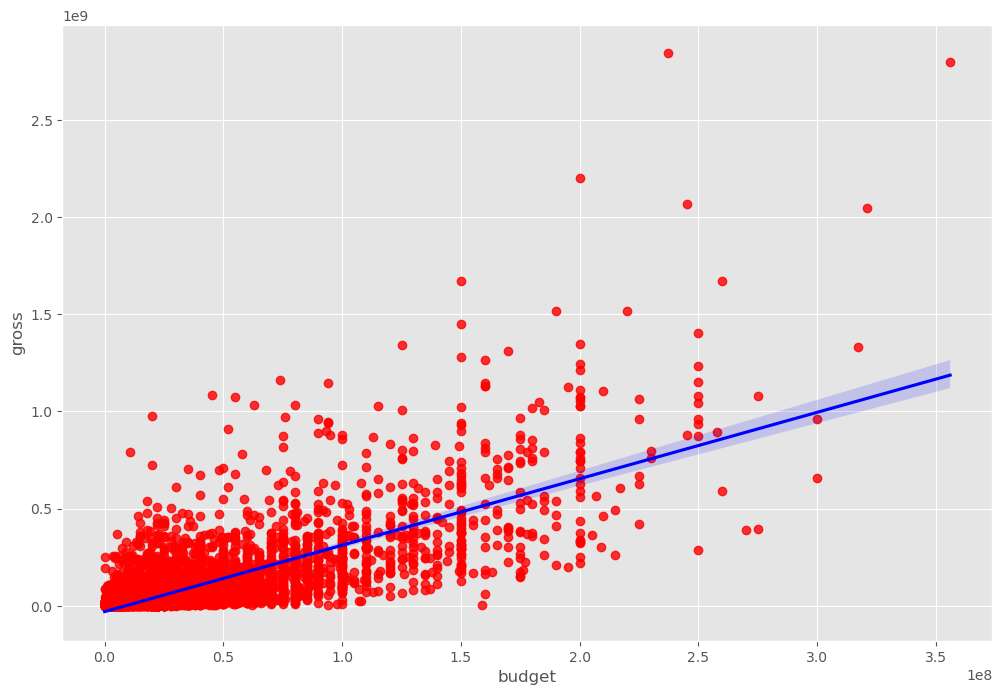

In [70]:
# plotting budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [78]:
# looking for correlations
df.corr(method = 'spearman', numeric_only = True)

year     score     votes    budget     gross   runtime
year     1.000000  0.099511  0.468681  0.258410  0.288616  0.143301
score    0.099511  1.000000  0.427349 -0.023859  0.130003  0.399919
votes    0.468681  0.427349  1.000000  0.372347  0.723568  0.289382
budget   0.258410 -0.023859  0.372347  1.000000  0.514713  0.265864
gross    0.288616  0.130003  0.723568  0.514713  1.000000  0.244220
runtime  0.143301  0.399919  0.289382  0.265864  0.244220  1.000000

we find from the correlation matrix that budget and gross have high correlation

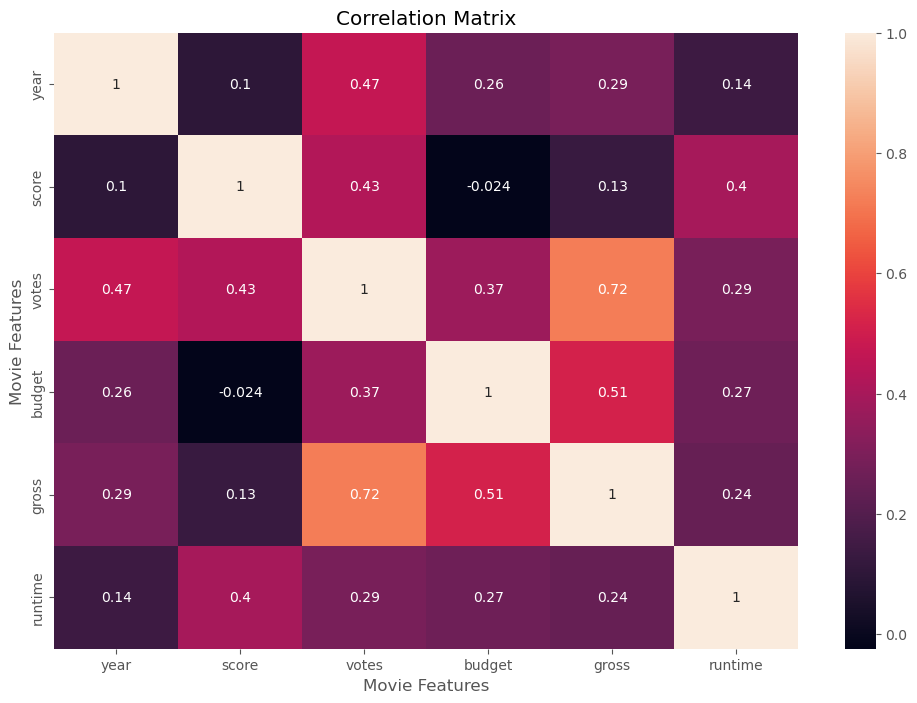

In [82]:
correlation_matrix = df.corr(method = 'spearman', numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [95]:
# looking at company (assumig a company has high revenue movie production)
# since 'company' column is a non umeric column, it nneeds to be convert to a numeric format
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes # Convert categorical data to numeric
display_scrollable(df_numerized.head())  

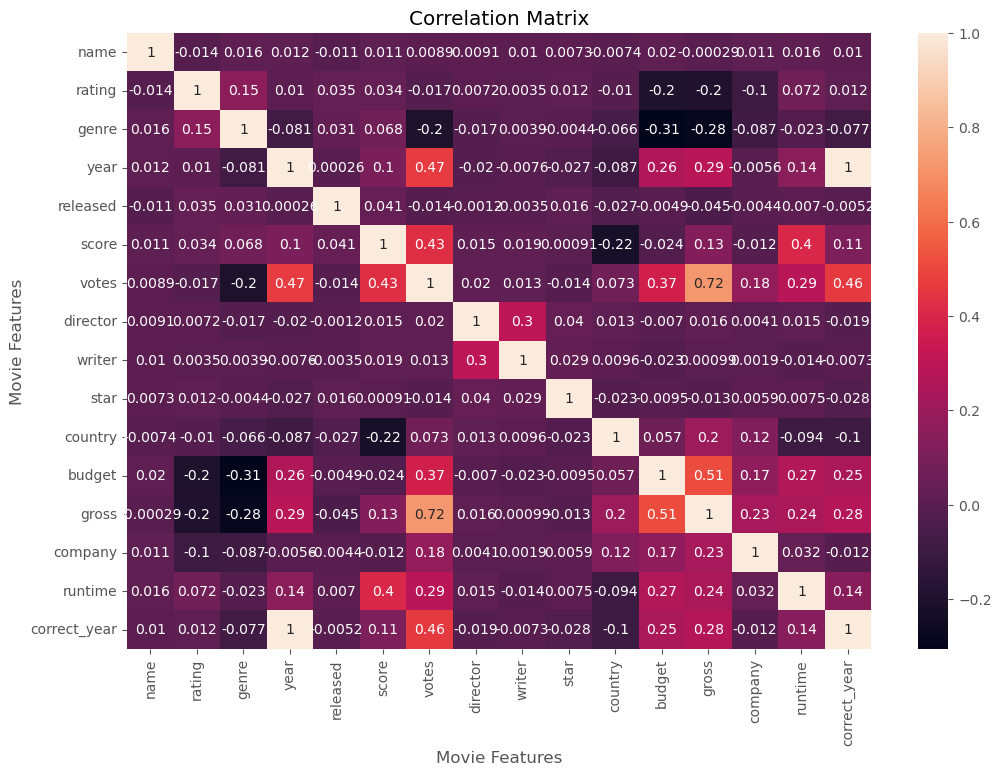

In [85]:
correlation_matrix = df_numerized.corr(method = 'spearman', numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [88]:
df_numerized.corr(numeric_only=True)

name    rating     genre      year  released     score  \
name          1.000000 -0.012843  0.016579  0.011162 -0.010622  0.016965   
rating       -0.012843  1.000000  0.136909  0.032982  0.025134  0.022032   
genre         0.016579  0.136909  1.000000 -0.080984  0.030561  0.028245   
year          0.011162  0.032982 -0.080984  1.000000 -0.000116  0.098522   
released     -0.010622  0.025134  0.030561 -0.000116  1.000000  0.042505   
score         0.016965  0.022032  0.028245  0.098522  0.042505  1.000000   
votes         0.013131 -0.004170 -0.145408  0.222599  0.016009  0.408862   
director      0.009236  0.012414 -0.015419 -0.020588 -0.001420  0.009454   
writer        0.010273 -0.000795  0.006463 -0.007549 -0.003522  0.019597   
star          0.007079  0.001739 -0.004878 -0.027590  0.015631 -0.001016   
country      -0.010434 -0.012018 -0.035712 -0.069706 -0.021747 -0.134260   
budget        0.021233 -0.149370 -0.327704  0.290952  0.010896  0.062006   
gross         0.006698 -0.130717 -0.233391  0.259591  0.000632  0.186930   
company       0.010171 -0.092968 -0.069838 -0.011706 -0.007764 -0.004308   
runtime       0.010643  0.058762 -0.052641  0.120961  0.001078  0.399525   
correct_year  0.009937  0.034540 -0.077936  0.996395 -0.005702  0.106811   

                 votes  director    writer      star   country    budget  \
name          0.013131  0.009236  0.010273  0.007079 -0.010434  0.021233   
rating       -0.004170  0.012414 -0.000795  0.001739 -0.012018 -0.149370   
genre        -0.145408 -0.015419  0.006463 -0.004878 -0.035712 -0.327704   
year          0.222599 -0.020588 -0.007549 -0.027590 -0.069706  0.290952   
released      0.016009 -0.001420 -0.003522  0.015631 -0.021747  0.010896   
score         0.408862  0.009454  0.019597 -0.001016 -0.134260  0.062006   
votes         1.000000  0.000284  0.000369 -0.019481  0.073457  0.459416   
director      0.000284  1.000000  0.299393  0.039711  0.018068 -0.004146   
writer        0.000369  0.299393  1.000000  0.028591  0.014588 -0.031488   
star         -0.019481  0.039711  0.028591  1.000000 -0.015023 -0.019017   
country       0.073457  0.018068  0.014588 -0.015023  1.000000  0.080075   
budget        0.459416 -0.004146 -0.031488 -0.019017  0.080075  1.000000   
gross         0.632050 -0.014654 -0.023086 -0.001954  0.093019  0.744625   
company       0.130635  0.004395  0.001993  0.008133  0.094117  0.163517   
runtime       0.309076  0.017502 -0.004193  0.008642 -0.079149  0.273422   
correct_year  0.217951 -0.020181 -0.007276 -0.027967 -0.080598  0.283375   

                 gross   company   runtime  correct_year  
name          0.006698  0.010171  0.010643      0.009937  
rating       -0.130717 -0.092968  0.058762      0.034540  
genre        -0.233391 -0.069838 -0.052641     -0.077936  
year          0.259591 -0.011706  0.120961      0.996395  
released      0.000632 -0.007764  0.001078     -0.005702  
score         0.186930 -0.004308  0.399525      0.106811  
votes         0.632050  0.130635  0.309076      0.217951  
director     -0.014654  0.004395  0.017502     -0.020181  
writer       -0.023086  0.001993 -0.004193     -0.007276  
star         -0.001954  0.008133  0.008642     -0.027967  
country       0.093019  0.094117 -0.079149     -0.080598  
budget        0.744625  0.163517  0.273422      0.283375  
gross         1.000000  0.153396  0.245118      0.252874  
company       0.153396  1.000000  0.031242     -0.017826  
runtime       0.245118  0.031242  1.000000      0.120591  
correct_year  0.252874 -0.017826  0.120591      1.000000

In [ ]:
# organizig to see the highest correlation
corr_mat = df_numerized.corr(numeric_only=True)
corr_pairs = corr_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.012843
              genre           0.016579
              year            0.011162
              released       -0.010622
              score           0.016965
              votes           0.013131
              director        0.009236
              writer          0.010273
              star            0.007079
              country        -0.010434
              budget          0.021233
              gross           0.006698
              company         0.010171
              runtime         0.010643
              correct_year    0.009937
rating        name           -0.012843
              rating          1.000000
              genre           0.136909
              year            0.032982
              released        0.025134
              score           0.022032
              votes          -0.004170
              director        0.012414
              writer         -0.000795
              star       

In [92]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.327704
budget        genre          -0.327704
genre         gross          -0.233391
gross         genre          -0.233391
rating        budget         -0.149370
budget        rating         -0.149370
votes         genre          -0.145408
genre         votes          -0.145408
country       score          -0.134260
score         country        -0.134260
gross         rating         -0.130717
rating        gross          -0.130717
              company        -0.092968
company       rating         -0.092968
year          genre          -0.080984
genre         year           -0.080984
correct_year  country        -0.080598
country       correct_year   -0.080598
runtime       country        -0.079149
country       runtime        -0.079149
correct_year  genre          -0.077936
genre         correct_year   -0.077936
company       genre          -0.069838
genre         company        -0.069838
country       year           -0.069706
year          country    

In [93]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs != 1)]
high_corr

gross         votes           0.632050
votes         gross           0.632050
budget        gross           0.744625
gross         budget          0.744625
year          correct_year    0.996395
correct_year  year            0.996395
dtype: float64

Conclusio: gross and budget has the highest correlation